In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torchvision import models
import torch.optim as optim

from skimage import io, transform

In [55]:
class PoseDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform = None):
        self.data_list = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
            
    def __len__(self):
        return self.data_list.shape[0]
    
    def __getitem__(self, idx):
        data_instance = self.data_list.iloc[idx]
        raw = cv2.imread(data_instance['raw'])
        raw = cv2.cvtColor(raw, cv2.COLOR_BGR2RGB)
        parsing = cv2.imread(data_instance['parsing'])
        pose = cv2.imread(data_instance['pose'])
        annotate = data_instance['annotate']
        
        sample = {'raw': raw, 'parsing': parsing, 'pose': pose, 'annotate': annotate}
        if self.transform:
            sample = self.transform(sample)
        return sample
    
def print_sample(sample):
    print(sample['annotate'])
    fig = plt.figure(figsize=(13, 13))
    for i in range(3):
        fig.add_subplot(1,3,i+1)
        img = sample[list(sample.keys())[i]]
        plt.imshow(img)
    plt.show()
    return

In [81]:
composed = transforms.Compose([Rescale(512),
                               DynamicCrop(50),
                               Rescale((350, 256))])

pose_dataset = PoseDataset('./data/data_list.csv', './data', composed)
pose_dataloader = DataLoader(pose_dataset)

(350, 256, 3)
canoeing, on camping trip (Taylor Code 270)


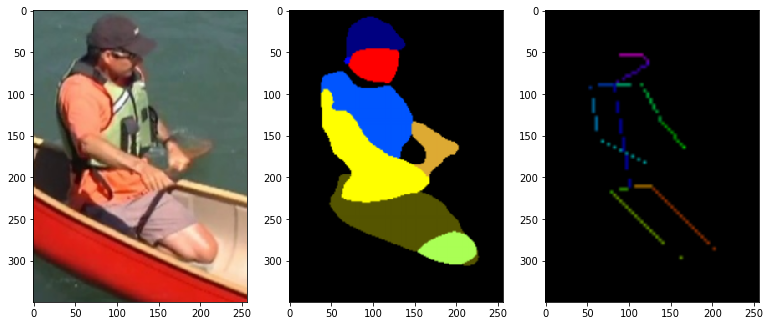

In [82]:
sample = pose_dataset[0]
print(sample['raw'].shape)
print_sample(sample)

In [10]:
from utils.process_img import Rescale, DynamicCrop, ToTensor

In [58]:
sample = pose_dataset[7]
composed = transforms.Compose([Rescale(512),
                               CenterCrop(400)])
sample = composed(sample)

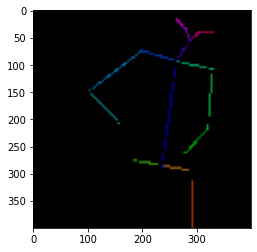

In [59]:
plt.imshow(sample['pose'])

In [ ]:
sample = pose_dataset[0]
sc = Rescale(1024)
sample = sc(sample)
dc = DynamicCrop(padding=96)
plt.imshow(dc(sample)['parsing'])

In [ ]:
plt.imshow(dc(sample)['pose'])
